<h1 align="center" style="color: orange"> Probability </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Distributions

**Normal Distribution or Gaussian Distribution**



In [2]:
rng = np.random.default_rng()

# Parameters for the normal distribution
mean, std_dev = 0, 3

# Generate random observations from the normal distribution
observations = rng.normal(mean, std_dev, size=1000)

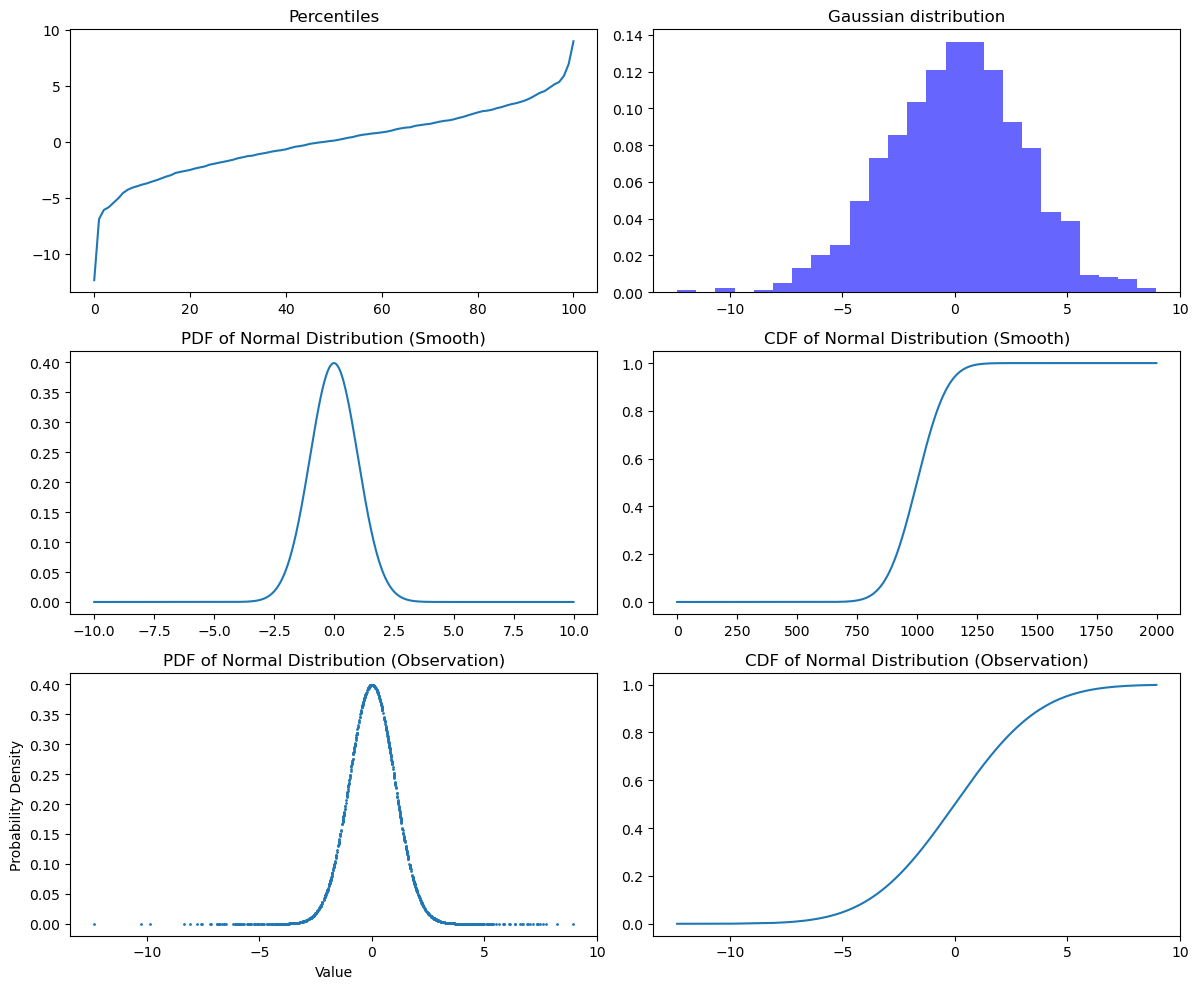

In [4]:
percentiles = np.percentile(observations, np.arange(0, 101))

# Calculate PDF (smoothened values)
data_points = np.arange(-10, 10, 0.01)
pdf = stats.norm.pdf(data_points)

# calculating CDF 
cdf = stats.norm.cdf(data_points)

# PDF and CDF of `observation`
pdf_observation = stats.norm.pdf(observations)

x = np.sort(observations)
cdf_observation = stats.norm.cdf(x, loc=mean, scale=std_dev)

# Plotting
# Percentiles
_, axes = plt.subplots(3, 2, figsize=(12, 10))
axes[0, 0].plot(percentiles)
axes[0, 0].set_title('Percentiles')

# distribution using histogram
axes[0, 1].hist(observations, bins=25, density=True, alpha=0.6, color='b')
axes[0, 1].set_title('Gaussian distribution')

# PDF 
axes[1, 0].plot(data_points, pdf)
axes[1, 0].set_title('PDF of Normal Distribution (Smooth)')

# CDF
axes[1, 1].plot(cdf)
axes[1, 1].set_title('CDF of Normal Distribution (Smooth)')

# PDF of `observations`
axes[2, 0].plot(observations, pdf_observation, 'o', markersize=1)
axes[2, 0].set_xlabel('Value')
axes[2, 0].set_ylabel('Probability Density')
axes[2, 0].set_title('PDF of Normal Distribution (Observation)')

# CDF of `observations`
axes[2, 1].plot(x, cdf_observation, markersize=1)
axes[2, 1].set_title('CDF of Normal Distribution (Observation)')

plt.tight_layout()
plt.show()

**Q-Q plot**

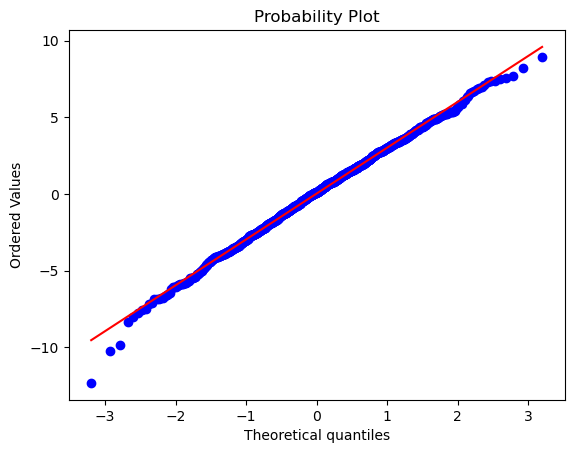

In [5]:
stats.probplot(observations, dist='norm', plot=plt)
plt.show()

**Student's t-distribution**

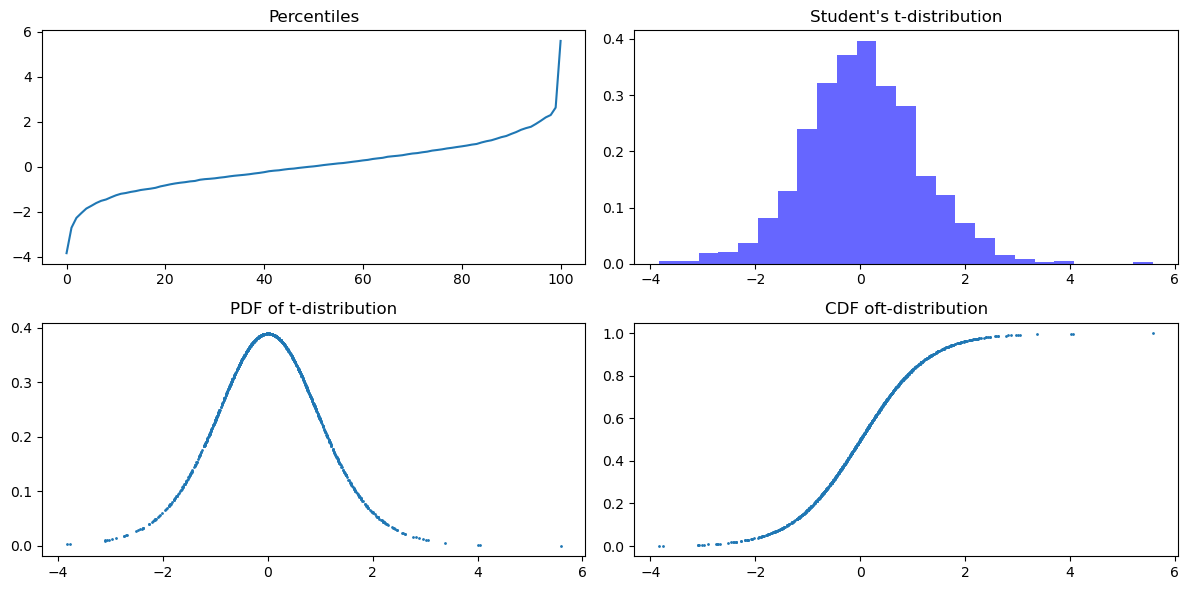

In [7]:
degree_of_freedom = 10
t_sample = rng.standard_t(degree_of_freedom, size=1000)
t_percentiles = np.percentile(t_sample, np.arange(0, 101))
t_pdf = stats.t.pdf(t_sample, degree_of_freedom)
x = np.sort(t_sample)
t_cdf = stats.t.cdf(t_sample, degree_of_freedom)


#plotting
_, axes = plt.subplots(2, 2, figsize=(12, 6))

axes[0, 0].plot(t_percentiles)
axes[0, 0].set_title('Percentiles')

axes[0, 1].hist(t_sample, bins=25, density=True, alpha=0.6, color='b')
axes[0, 1].set_title("Student's t-distribution")

axes[1, 0].plot(t_sample, t_pdf, 'o', markersize=1)
axes[1, 0].set_title('PDF of t-distribution')

axes[1, 1].plot(t_sample, t_cdf, 'o',  markersize=1)
axes[1, 1].set_title('CDF oft-distribution')

plt.tight_layout()
plt.show()

**Uniform Distribution**

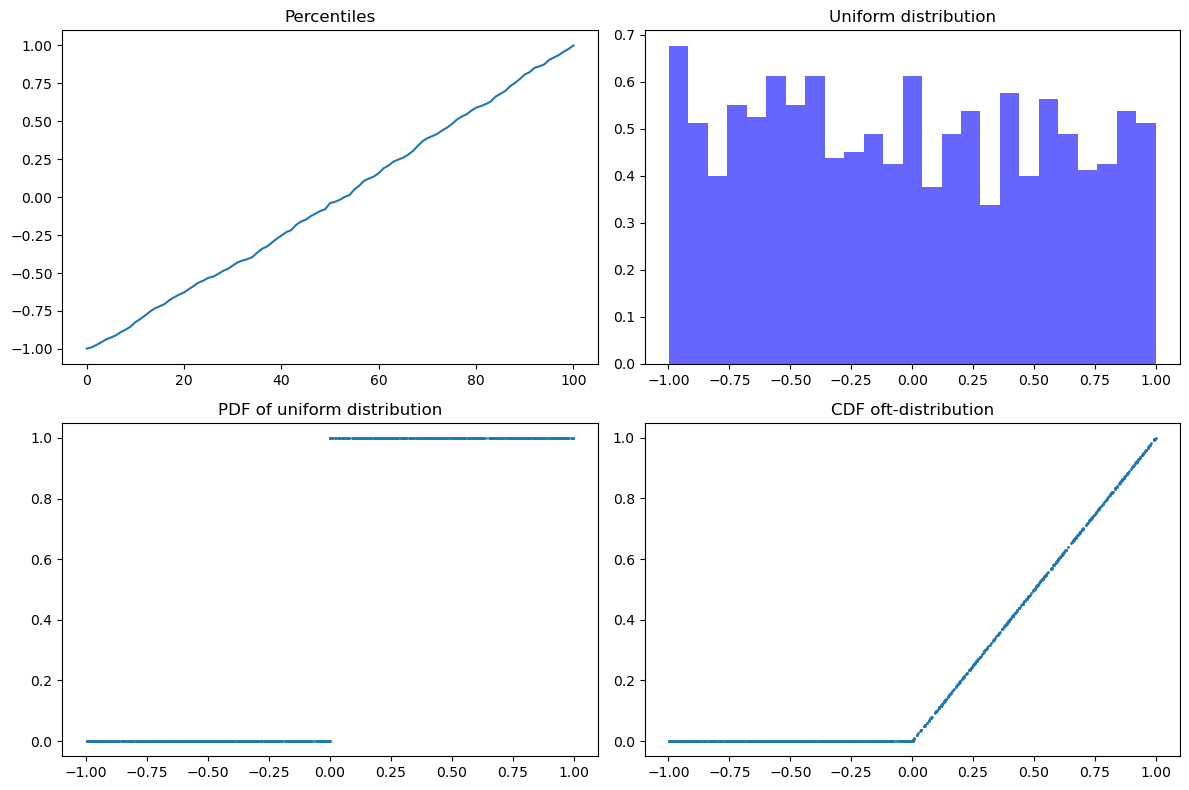

In [16]:
# Uniform distribution parameters
a = -1  # Lower bound
b = 1   # Upper bound

uniform_dist = rng.uniform(a, b, 1000)
percentiles_uniform = np.percentile(uniform_dist, np.arange(0, 101))
uniform_pdf = stats.uniform.pdf(uniform_dist)
uniform_cdf = stats.uniform.cdf(uniform_dist)

_, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(percentiles_uniform)
axes[0, 0].set_title('Percentiles')

axes[0, 1].hist(uniform_dist, bins=25, density=True, alpha=0.6, color='b')
axes[0, 1].set_title("Uniform distribution")

axes[1, 0].plot(uniform_dist, uniform_pdf, 'o', markersize=1)
axes[1, 0].set_title('PDF of uniform distribution')

axes[1, 1].plot(uniform_dist, uniform_cdf, 'o', markersize=1)
axes[1, 1].set_title('CDF oft-distribution')

plt.tight_layout()
plt.show()

**Chi-squared distribution**

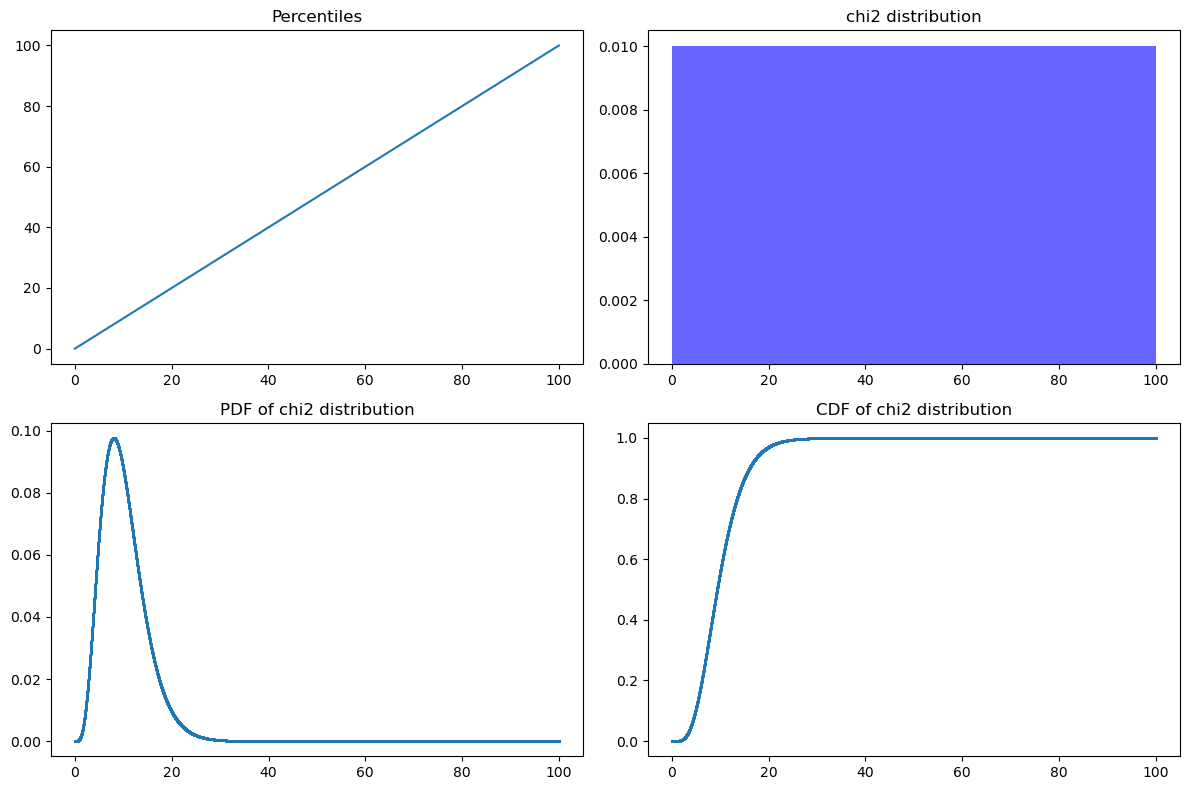

In [21]:
chi_sample = np.arange(0, 100, 0.01)
degree_of_freedom = 10

chi_percentile = np.percentile(chi_sample, np.arange(0, 101))
chi_pdf = stats.chi2.pdf(chi_sample, degree_of_freedom)
chi_cdf = stats.chi2.cdf(chi_sample, degree_of_freedom)

_, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(chi_percentile)
axes[0, 0].set_title('Percentiles')

axes[0, 1].hist(chi_sample, bins=25, density=True, alpha=0.6, color='b')
axes[0, 1].set_title("chi2 distribution")

axes[1, 0].plot(chi_sample, chi_pdf, 'o', markersize=1)
axes[1, 0].set_title('PDF of chi2 distribution')

axes[1, 1].plot(chi_sample, chi_cdf, 'o', markersize=1)
axes[1, 1].set_title('CDF of chi2 distribution')

plt.tight_layout()
plt.show()

**Binomial Distribution**

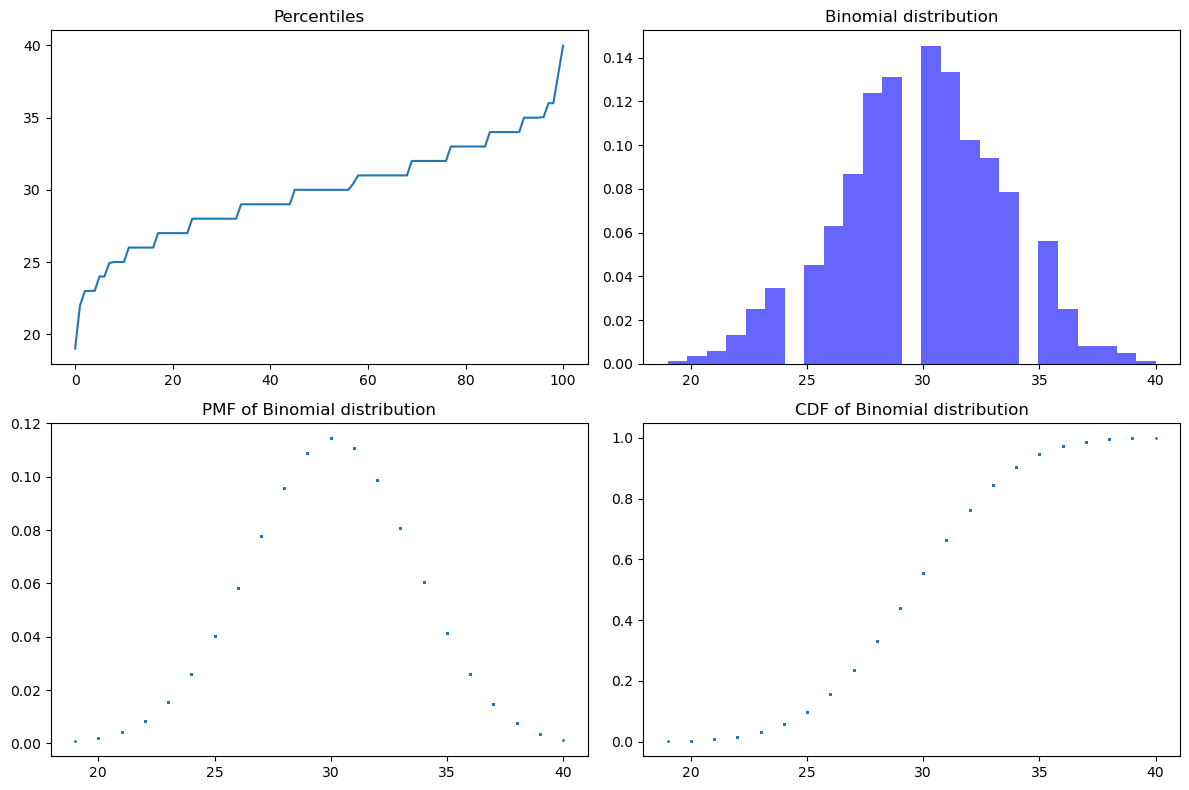

In [13]:
binomial_sample = rng.binomial(50, 0.6, 1000)

binomial_percentile = np.percentile(binomial_sample, np.arange(0, 101))
binomial_pmf = stats.binom.pmf( binomial_sample, 50, 0.6)
binomial_cdf = stats.binom.cdf(binomial_sample, 50, 0.6)

_, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(binomial_percentile)
axes[0, 0].set_title('Percentiles')

axes[0, 1].hist(binomial_sample, bins=25, density=True, alpha=0.6, color='b')
axes[0, 1].set_title("Binomial distribution")

axes[1, 0].plot(binomial_sample, binomial_pmf, 'o', markersize=1)
axes[1, 0].set_title('PMF of Binomial distribution')

axes[1, 1].plot(binomial_sample, binomial_cdf, 'o', markersize=1)
axes[1, 1].set_title('CDF of Binomial distribution')

plt.tight_layout()
plt.show()

**Box Cox Transformation**

$$\color{#F99417}Normal \rightarrow exponential \rightarrow  normal$$

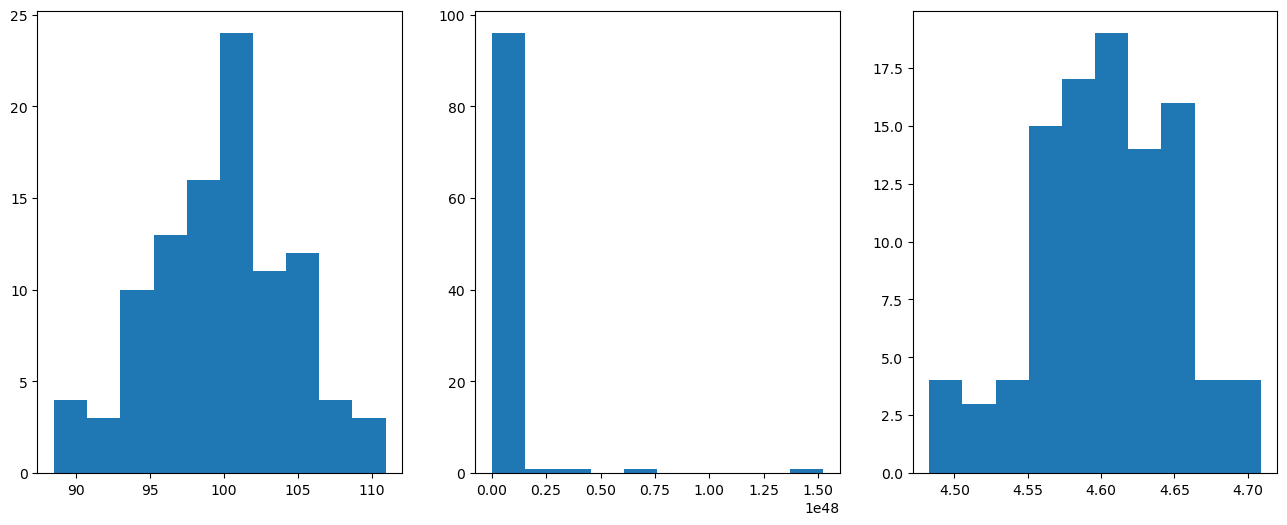

In [18]:
data = 5* np.random.randn(100) + 100

# exponential
exponential = np.exp(data)

# box-cox
res = stats.boxcox(data, 0)

_, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].hist(data)
axes[1].hist(exponential)
axes[2].hist(res)

plt.show()

## API's covered

- [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)


- [np.random.default_rng().normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) : Draw random samples from a normal (Gaussian) distribution (`numpy.random.Generator.normal`).

- [numpy.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)

- [numpy.median](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html)

- [numpy.var](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)

- [numpy.std](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)

